<a href="https://colab.research.google.com/github/LilianYou/dark-lily/blob/master/3_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch

Create Tensors

In [0]:
b = torch.FloatTensor([[1,2,3],
                       [3,2,1]])
t = torch.FloatTensor([[1,0],[1,0]])

Basic operationts

In [0]:
g = b*b #element-wise multiplication

In [0]:
torch.mm(b,b.transpose(0,1))

tensor([[14., 10.],
        [10., 14.]])

Autodifferentiation and Graph

In [0]:
v1 = torch.tensor([1.0, 1.0], requires_grad=True)
v2 = torch.tensor([2.0, 2.0])
v_sum = v1 + v2
v_res = (v_sum*2).sum()

In [0]:
v_res.backward() #this command computes the gradient
v1.grad

tensor([2., 2.])

Device (be sure to enable a GPU runtime)

In [0]:
b.device

device(type='cpu')

In [0]:
b_cuda = b.cuda()

Neural Network Training

In [0]:
my_module = torch.nn.Module()
my_module()

NotImplementedError: ignored

In [0]:
lin = torch.nn.Linear(5,2)

In [0]:
x = torch.ones([1,5])
lin(x)

tensor([[-0.2875, -0.3653]], grad_fn=<AddmmBackward>)

In [0]:
my_first_nn = torch.nn.Sequential(torch.nn.Linear(3, 5),
                                  torch.nn.Sigmoid(), #this is an activation function
                                  torch.nn.Linear(5, 20),
                                  torch.nn.Sigmoid(),
                                  torch.nn.Linear(20, 2))

In [0]:
my_first_nn

Sequential(
  (0): Linear(in_features=3, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=20, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=20, out_features=2, bias=True)
)

In [0]:
my_first_nn(b)

tensor([[-0.0858, -0.0465],
        [-0.0763, -0.0354]], grad_fn=<AddmmBackward>)

In [0]:
class MySecondNetwork(torch.nn.Module):
    def __init__(self, n1, n2, n3, num_classes):
        super(MySecondNetwork, self).__init__()
        self.layer1 = torch.nn.Linear(n1,n2)
        self.layer2 = torch.nn.Linear(n2,n3)
        self.layer3 = torch.nn.Linear(n3,num_classes)

    def forward(self, data):
        y1 = self.layer1(data)
        y2 = self.layer2(y1  )
        y3 = self.layer3(y2  )
        return y3

my_second_net = MySecondNetwork(3,10,5,2)

In [0]:
my_second_net(b)

tensor([[ 0.2520, -0.3847],
        [ 0.5542, -0.5533]], grad_fn=<AddmmBackward>)

In [0]:
list(my_first_nn.parameters())

[Parameter containing:
 tensor([[-0.0073, -0.2187,  0.3011],
         [-0.2412, -0.0458, -0.2390],
         [ 0.5364, -0.0743,  0.5549],
         [ 0.2180,  0.0236, -0.1525],
         [-0.4591, -0.2131,  0.2306]], requires_grad=True),
 Parameter containing:
 tensor([-0.1602, -0.2406, -0.1462,  0.5278, -0.5606], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0743,  0.0815, -0.0134,  0.3245,  0.3013],
         [-0.3582,  0.1390,  0.3787, -0.0169,  0.3190],
         [ 0.1358,  0.4297,  0.4420, -0.1363,  0.0970],
         [-0.2841, -0.4066, -0.1415, -0.0718,  0.0141],
         [ 0.1770,  0.2564, -0.2417,  0.3352,  0.1705],
         [ 0.2232, -0.1397, -0.2036,  0.2686,  0.4103],
         [ 0.2349,  0.2487, -0.3935, -0.0609,  0.4038],
         [ 0.2981, -0.1936,  0.1665, -0.3591, -0.2235],
         [-0.3421,  0.3367, -0.1088,  0.2141,  0.4307],
         [-0.3633,  0.3423,  0.3894, -0.2816, -0.1785],
         [-0.2460,  0.2014, -0.2409, -0.1150, -0.2730],
         [ 0.2178, -0.2646,

In [0]:
mse_loss = torch.nn.MSELoss()
loss = mse_loss(my_first_nn(b), t)
loss

tensor(0.5852, grad_fn=<MseLossBackward>)

In [0]:
opt = torch.optim.SGD(my_first_nn.parameters(), lr=1e-3)

In [0]:
def train_step(data, tgt, net, opt_fn, loss_fn):
    y = net(data)
    loss = loss_fn(y, tgt)
    loss.backward()
    opt_fn.step()
    opt_fn.zero_grad()
    return loss

for i in range(100):
    print(train_step(b, t, my_first_nn, opt, mse_loss)  )

tensor(0.5852, grad_fn=<MseLossBackward>)
tensor(0.5778, grad_fn=<MseLossBackward>)
tensor(0.5705, grad_fn=<MseLossBackward>)
tensor(0.5633, grad_fn=<MseLossBackward>)
tensor(0.5561, grad_fn=<MseLossBackward>)
tensor(0.5491, grad_fn=<MseLossBackward>)
tensor(0.5422, grad_fn=<MseLossBackward>)
tensor(0.5353, grad_fn=<MseLossBackward>)
tensor(0.5285, grad_fn=<MseLossBackward>)
tensor(0.5218, grad_fn=<MseLossBackward>)
tensor(0.5152, grad_fn=<MseLossBackward>)
tensor(0.5087, grad_fn=<MseLossBackward>)
tensor(0.5023, grad_fn=<MseLossBackward>)
tensor(0.4959, grad_fn=<MseLossBackward>)
tensor(0.4896, grad_fn=<MseLossBackward>)
tensor(0.4834, grad_fn=<MseLossBackward>)
tensor(0.4773, grad_fn=<MseLossBackward>)
tensor(0.4713, grad_fn=<MseLossBackward>)
tensor(0.4653, grad_fn=<MseLossBackward>)
tensor(0.4594, grad_fn=<MseLossBackward>)
tensor(0.4536, grad_fn=<MseLossBackward>)
tensor(0.4479, grad_fn=<MseLossBackward>)
tensor(0.4422, grad_fn=<MseLossBackward>)
tensor(0.4366, grad_fn=<MseLossBac

In [0]:


from torchvision import datasets, transforms

train_loader = torch.utils.data.DataLoader(
                      datasets.MNIST('./data',
                                     train=True, download=True,
                                     transform=transforms.Compose([
                                                    transforms.ToTensor(),
                                                    transforms.Normalize((0.1307,), (0.3081,))
                                                    ])
                                     ), batch_size=100, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:01, 9380793.17it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 136112.27it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 2481354.86it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 52210.20it/s]            

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
data, target = next(iter(train_loader))


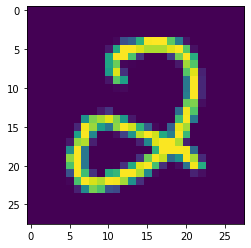

In [0]:
from pylab import *
imshow(data[0,0])

In [0]:
b.shape

torch.Size([2, 3])